#### Dataset

In [3]:
# location: https://mitu.co.in/dataset
# dataset: loan-prediction.csv

#### Import the libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

In [7]:
df = pd.read_csv('loan-prediction.csv')

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Separate the dependent and independent variables

In [11]:
x = df.drop(['Loan_ID','Loan_Status'], axis = 1)
y = df['Loan_Status']

In [12]:
x.shape

(614, 11)

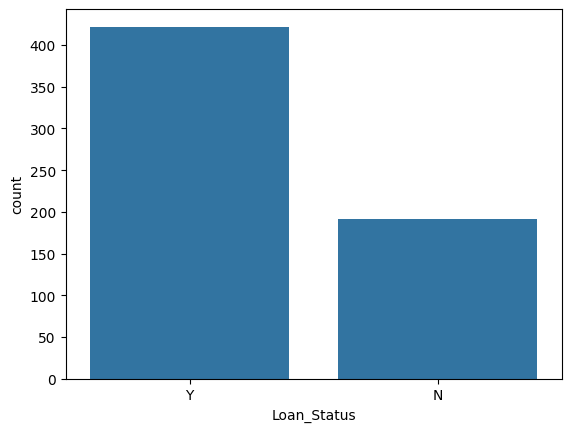

In [13]:
sns.countplot(x = y);

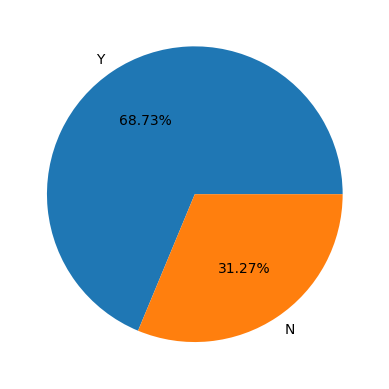

In [16]:
plt.pie(y.value_counts(), labels=y.value_counts().index,
       autopct='%2.2f%%');

In [17]:
x.count()

Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
dtype: int64

In [18]:
x.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
x = df.drop(['Loan_ID','Loan_Status'], axis = 1)
y = df['Loan_Status']

In [22]:
x.shape

(480, 11)

In [23]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [25]:
x.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [26]:
x_new = pd.get_dummies(x)

In [27]:
x_new.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [28]:
x_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True


In [30]:
x_new.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Dependents_0                  bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Graduate            bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

#### Build the risk modeler

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
risk_modeler = GaussianNB()

In [34]:
risk_modeler.fit(x_new, y)

GaussianNB()

In [37]:
new = x_new.iloc[[67],:]

In [38]:
new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
85,2366,2531.0,136.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,True,False


In [39]:
risk_modeler.predict_proba(new)

array([[0.01974009, 0.98025991]])

In [40]:
risk_modeler.classes_

array(['N', 'Y'], dtype='<U1')

In [59]:
new = x_new.iloc[[167,305,238,48,226],:]
risk_modeler.predict_proba(new)

array([[0.16987411, 0.83012589],
       [0.00668451, 0.99331549],
       [0.997924  , 0.002076  ],
       [0.02087992, 0.97912008],
       [0.12864698, 0.87135302]])

#### Classification Dataset

In [61]:
from sklearn.datasets import make_classification

In [64]:
data = make_classification(n_samples=1000, n_features=10, 
                           n_classes=3, random_state=0, n_informative=3)

In [68]:
data[0].shape

(1000, 10)

In [69]:
data[1].shape

(1000,)

In [70]:
df = pd.DataFrame(data=data[0])

In [72]:
df['class'] = data[1]

In [73]:
df

,0,1,2,3,4,5,6,7,8,9,class
0,0.819779,-1.209914,-0.722380,1.003950,-0.979971,0.863045,-1.305264,1.931509,-0.218147,1.052379,0
1,-0.079849,-1.332187,0.174223,0.362889,0.542220,0.609956,-1.394318,3.261326,0.436210,-0.284100,0
2,0.448398,1.467524,1.626891,1.487932,-0.093216,1.365850,0.904803,0.199811,1.066764,-1.343350,2
3,-1.188151,-0.976029,1.366291,-0.137204,-0.480942,0.711755,2.501837,-1.601705,1.693881,-2.300939,2
4,0.322170,-0.299055,0.229044,0.110691,-0.250154,1.725162,2.018810,-1.081597,1.487460,-2.044366,2
...,...,...,...,...,...,...,...,...,...,...,...
995,0.857132,-1.592681,-0.571533,0.205845,-2.089823,1.485980,1.145587,-1.272726,0.497331,0.070588,1
996,1.345835,0.449556,0.476607,0.363212,-0.031968,-0.933691,1.807801,-1.349057,1.105564,-1.679314,2
997,1.201039,-0.106445,0.640789,-2.166358,-0.549258,2.683211,1.355574,-0.975544,0.860544,-1.058197,2
998,-0.004350,1.735186,2.102210,-0.815035,0.324706,0.302458,0.870952,-1.102547,0.261084,-0.676430,2


#### Regression Dataset

In [76]:
from sklearn.datasets import make_regression

In [77]:
reg_data = make_regression(n_samples=500, n_features=5)

In [79]:
reg_data[0].shape

(500, 5)

In [80]:
reg_data[1].shape

(500,)

In [81]:
reg_data[1]

array([-4.27284805e+01, -1.27042017e+02, -5.01658322e+01, -1.59352275e+02,
        6.44033653e+00,  5.84354166e+01, -9.90126587e+01, -3.30403617e+01,
        5.36491250e+01,  1.40276343e+02,  4.49119874e+01, -1.46352549e+01,
        1.23878762e+01,  1.55069483e+02, -9.42252162e+01,  5.73208244e+01,
        2.19748302e+01, -1.12263221e+02, -1.88126448e+02, -8.16793263e+01,
        1.03426678e+02, -2.35238110e+01,  5.69184089e+01,  2.29163569e+02,
       -1.81056694e+01,  2.97370561e+01,  5.75071853e+01, -1.22270733e+02,
        1.88184092e+02, -5.37075796e+01,  1.39022870e+02,  7.43611599e+00,
        3.02569609e+01,  2.11179098e+02,  2.61403924e+01, -1.70392210e+02,
        1.97425688e+01, -1.97329032e+02, -1.47713254e+02,  7.96182442e+01,
        7.77617080e+01,  6.81563636e+01, -1.44130518e+02, -2.71684140e+02,
       -6.87052972e+01,  1.48819712e+02,  3.04547265e+02, -7.36430334e+01,
        1.79819814e+02,  7.84444964e+01, -3.26215652e+02, -7.22324289e+00,
        8.10346383e+01, -

#### Creating clustering dataset

In [83]:
from sklearn.datasets import make_blobs

In [84]:
data_clu = make_blobs(n_samples=700, n_features=6)

In [86]:
data_clu[0].shape

(700, 6)

In [87]:
data_clu[1].shape

(700,)

##### Generate the data with standard normal distribution

In [90]:
#scipy.stats.norm.rvs

In [91]:
from scipy.stats import norm

In [92]:
# The following code shows how to generate 100 random samples
# from a normal distribution with mean 0 and standard deviation 1:

In [97]:
samples = norm.rvs(loc=0, scale=1, size=100)

In [98]:
samples

array([-0.97884397,  0.53889366,  0.35416338,  0.25999416, -0.38432563,
       -1.78537703,  0.711669  ,  0.29148922, -1.97433477,  0.69571942,
       -0.10683107, -2.19673578, -2.2006872 , -0.23990806, -0.81657883,
        0.15689832,  0.5005226 ,  0.22694438, -0.65471036, -1.59188567,
       -0.04079352,  1.89320698, -0.82690829, -0.15926755,  1.61231274,
       -0.94312506, -1.45665811,  0.9904374 , -0.13422702,  0.70906409,
       -0.33757653, -0.97180583,  0.40140897,  0.01678804, -0.09800423,
       -0.61338979, -1.32067271,  1.39093534, -2.08871415, -0.30099656,
       -0.02756732,  0.52553819,  2.09012604,  0.37752721, -1.29823909,
       -2.57530765,  0.61791632,  0.89304846, -0.94637172,  1.75225072,
       -1.98540442,  0.04713444,  0.61564692, -0.81652061, -0.15998356,
       -1.45587587, -1.56358625, -0.78692846, -0.78734959,  1.07453716,
        1.15325692,  0.06392734,  1.56753874,  1.63779344,  0.28168068,
        0.88259375,  0.21974978, -0.51158488,  1.18574939, -1.24

In [99]:
samples.mean()

-0.01633956418422506

In [100]:
samples.std()

1.0360987602594904

<Axes: ylabel='Density'>

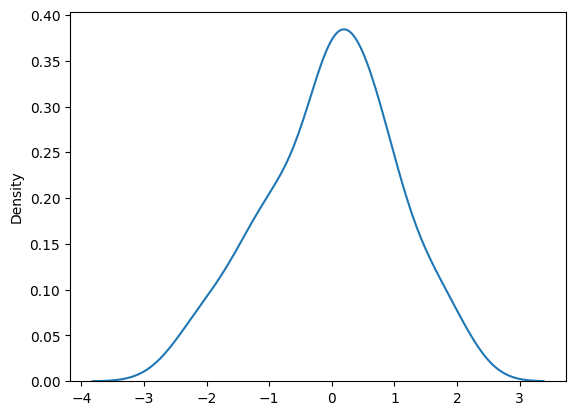

In [101]:
sns.kdeplot(samples)

In [103]:
samples.min(), samples.max()

(-2.5753076515449256, 2.134517672360318)

##### Generate data with poisson distribution

In [105]:
from scipy.stats import poisson

In [106]:
# Set the mean number of customers per hour.
mean_customers_per_hour = 5

In [122]:
# Generate a random sample of the number of customers that
# arrive at the store in one hour.
number_of_customers = poisson.rvs(mean_customers_per_hour, size=1)

In [123]:
# Print the number of customers.
print(number_of_customers)

[5]


In [127]:
custs = []
for n in range(1000):
    number_of_customers = poisson.rvs(mean_customers_per_hour, size=1)
    custs.append(number_of_customers[0])

In [128]:
sum(custs) / len(custs)

5.091

<Axes: ylabel='Density'>

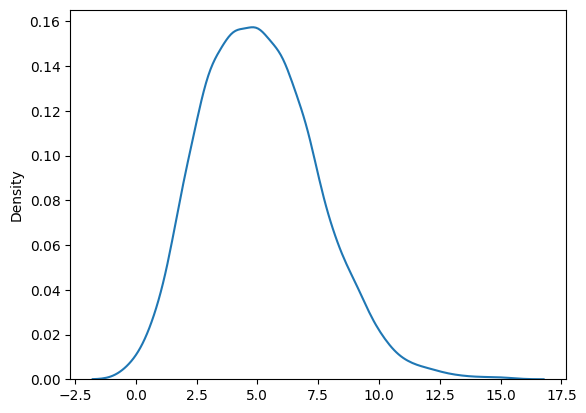

In [129]:
sns.kdeplot(custs)